<a href="https://colab.research.google.com/github/M27urodkhon/Aviakompaniya/blob/master/2_Serficat.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [480]:
import pandas as pd
import numpy as np
import sklearn  # scikit-learn kutubxonasi
import matplotlib.pyplot as plt
%matplotlib inline
import seaborn as sns 
sns.set() # setting seaborn deffaault for plota

In [481]:
# musobaqa tomonidan taqdim etilgan data'lani ozgaruvchi ochib tenglab olamiz
train = pd.read_csv("train_dataset.csv")
test = pd.read_csv("test_dataset.csv")
sample = pd.read_csv("sample_submission.csv")

In [482]:
# head funksiyasi yoradamida  train data'mizning 10 taqatorini koramiza
train.head(10)

,id,Gender,Customer Type,Age,Type of Travel,Class,Flight Distance,Inflight wifi service,Departure/Arrival time convenient,Ease of Online booking,...,Inflight entertainment,On-board service,Leg room service,Baggage handling,Checkin service,Inflight service,Cleanliness,Departure Delay in Minutes,Arrival Delay in Minutes,satisfaction
0,1,Male,disloyal Customer,33,Business travel,Eco,571,2,3,2,...,4,3,1,3,4,3,4,10,3.0,0
1,2,Female,Loyal Customer,49,Business travel,Business,1431,4,1,4,...,5,5,5,5,3,5,3,0,0.0,1
2,3,Female,Loyal Customer,43,Business travel,Eco,867,1,4,4,...,1,1,1,1,1,1,2,0,18.0,0
3,4,Female,Loyal Customer,27,Business travel,Business,1550,3,3,3,...,2,4,4,5,5,4,2,0,0.0,1
4,5,Male,Loyal Customer,11,Personal Travel,Eco,526,3,4,3,...,4,5,2,5,3,5,4,0,10.0,0
5,6,Male,Loyal Customer,30,Personal Travel,Eco Plus,1034,2,4,2,...,5,4,5,5,4,4,5,0,0.0,0
6,7,Male,Loyal Customer,38,Business travel,Eco,826,5,1,1,...,5,1,4,4,5,4,5,2,5.0,1
7,8,Female,Loyal Customer,39,Business travel,Eco Plus,162,3,4,4,...,3,3,5,5,1,3,3,0,0.0,1
8,9,Male,disloyal Customer,43,Business travel,Business,541,2,2,2,...,3,5,2,5,4,4,3,0,0.0,0
9,10,Female,disloyal Customer,24,Business travel,Eco,1065,4,4,4,...,2,4,2,4,2,4,2,10,17.0,0


In [483]:
# head funksiyasi yordamida test datamizning boshidagi 5 ta qatorini korib olamiz
test.head()

,id,Gender,Customer Type,Age,Type of Travel,Class,Flight Distance,Inflight wifi service,Departure/Arrival time convenient,Ease of Online booking,...,Seat comfort,Inflight entertainment,On-board service,Leg room service,Baggage handling,Checkin service,Inflight service,Cleanliness,Departure Delay in Minutes,Arrival Delay in Minutes
0,1,Female,Loyal Customer,25,Personal Travel,Eco,2704,2,2,2,...,5,2,4,4,3,5,1,5,152,191.0
1,2,Female,Loyal Customer,49,Business travel,Business,1623,1,1,1,...,4,2,2,2,2,4,2,3,60,52.0
2,3,Male,Loyal Customer,51,Business travel,Business,338,4,4,4,...,5,5,5,5,5,4,5,4,0,0.0
3,4,Male,Loyal Customer,34,Business travel,Eco Plus,95,0,0,0,...,1,5,4,4,1,3,3,5,0,0.0
4,5,Male,Loyal Customer,34,Personal Travel,Eco,602,4,4,4,...,5,5,4,5,4,5,5,5,130,140.0


In [484]:
# shape funksiyasi train data ichidagi qatorlar va ustunlar sonini chop etib beradi
train.shape

(10000, 24)

In [485]:
# shape funksiyasi test data ichidagi qatorlar va ustunlar sonini chop etib beradi
test.shape

(4000, 23)

In [486]:
train.drop(['id'],axis=1,inplace=True)   # train datasetdagi keraksiz ustunlarini olib tashlash
test.drop(['id'],axis=1,inplace=True)    # test datasetdagi keraksiz ustunlarini olib tashlash

print('train dataset size:',len(train))
print('test dataset size:',len(test))

train dataset size: 10000
test dataset size: 4000


In [487]:
train.head(10)

,Gender,Customer Type,Age,Type of Travel,Class,Flight Distance,Inflight wifi service,Departure/Arrival time convenient,Ease of Online booking,Gate location,...,Inflight entertainment,On-board service,Leg room service,Baggage handling,Checkin service,Inflight service,Cleanliness,Departure Delay in Minutes,Arrival Delay in Minutes,satisfaction
0,Male,disloyal Customer,33,Business travel,Eco,571,2,3,2,4,...,4,3,1,3,4,3,4,10,3.0,0
1,Female,Loyal Customer,49,Business travel,Business,1431,4,1,4,4,...,5,5,5,5,3,5,3,0,0.0,1
2,Female,Loyal Customer,43,Business travel,Eco,867,1,4,4,4,...,1,1,1,1,1,1,2,0,18.0,0
3,Female,Loyal Customer,27,Business travel,Business,1550,3,3,3,3,...,2,4,4,5,5,4,2,0,0.0,1
4,Male,Loyal Customer,11,Personal Travel,Eco,526,3,4,3,2,...,4,5,2,5,3,5,4,0,10.0,0
5,Male,Loyal Customer,30,Personal Travel,Eco Plus,1034,2,4,2,2,...,5,4,5,5,4,4,5,0,0.0,0
6,Male,Loyal Customer,38,Business travel,Eco,826,5,1,1,1,...,5,1,4,4,5,4,5,2,5.0,1
7,Female,Loyal Customer,39,Business travel,Eco Plus,162,3,4,4,4,...,3,3,5,5,1,3,3,0,0.0,1
8,Male,disloyal Customer,43,Business travel,Business,541,2,2,2,5,...,3,5,2,5,4,4,3,0,0.0,0
9,Female,disloyal Customer,24,Business travel,Eco,1065,4,4,4,3,...,2,4,2,4,2,4,2,10,17.0,0


In [488]:
# train data'ning har bir ustulari haqida ma'lumot
train.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 10000 entries, 0 to 9999
Data columns (total 23 columns):
 #   Column                             Non-Null Count  Dtype  
---  ------                             --------------  -----  
 0   Gender                             10000 non-null  object 
 1   Customer Type                      10000 non-null  object 
 2   Age                                10000 non-null  int64  
 3   Type of Travel                     10000 non-null  object 
 4   Class                              10000 non-null  object 
 5   Flight Distance                    10000 non-null  int64  
 6   Inflight wifi service              10000 non-null  int64  
 7   Departure/Arrival time convenient  10000 non-null  int64  
 8   Ease of Online booking             10000 non-null  int64  
 9   Gate location                      10000 non-null  int64  
 10  Food and drink                     10000 non-null  int64  
 11  Online boarding                    10000 non-null  int6

In [489]:
# test data'ning har bir ustulari haqida ma'lumot
test.info()


<class 'pandas.core.frame.DataFrame'>
RangeIndex: 4000 entries, 0 to 3999
Data columns (total 22 columns):
 #   Column                             Non-Null Count  Dtype  
---  ------                             --------------  -----  
 0   Gender                             4000 non-null   object 
 1   Customer Type                      4000 non-null   object 
 2   Age                                4000 non-null   int64  
 3   Type of Travel                     4000 non-null   object 
 4   Class                              4000 non-null   object 
 5   Flight Distance                    4000 non-null   int64  
 6   Inflight wifi service              4000 non-null   int64  
 7   Departure/Arrival time convenient  4000 non-null   int64  
 8   Ease of Online booking             4000 non-null   int64  
 9   Gate location                      4000 non-null   int64  
 10  Food and drink                     4000 non-null   int64  
 11  Online boarding                    4000 non-null   int64

In [490]:
# train data'dagi yetishmayotgan qiymatlarni sonini topish
train.isnull().sum()


Gender                                0
Customer Type                         0
Age                                   0
Type of Travel                        0
Class                                 0
Flight Distance                       0
Inflight wifi service                 0
Departure/Arrival time convenient     0
Ease of Online booking                0
Gate location                         0
Food and drink                        0
Online boarding                       0
Seat comfort                          0
Inflight entertainment                0
On-board service                      0
Leg room service                      0
Baggage handling                      0
Checkin service                       0
Inflight service                      0
Cleanliness                           0
Departure Delay in Minutes            0
Arrival Delay in Minutes             28
satisfaction                          0
dtype: int64

In [491]:
# test data'dagi yetishmayotgan qiymatlarni sonini topish
test.isnull().sum()

Gender                                0
Customer Type                         0
Age                                   0
Type of Travel                        0
Class                                 0
Flight Distance                       0
Inflight wifi service                 0
Departure/Arrival time convenient     0
Ease of Online booking                0
Gate location                         0
Food and drink                        0
Online boarding                       0
Seat comfort                          0
Inflight entertainment                0
On-board service                      0
Leg room service                      0
Baggage handling                      0
Checkin service                       0
Inflight service                      0
Cleanliness                           0
Departure Delay in Minutes            0
Arrival Delay in Minutes             19
dtype: int64

In [492]:
train.dropna(inplace = True) 
train.isnull().sum() #check null again

Gender                               0
Customer Type                        0
Age                                  0
Type of Travel                       0
Class                                0
Flight Distance                      0
Inflight wifi service                0
Departure/Arrival time convenient    0
Ease of Online booking               0
Gate location                        0
Food and drink                       0
Online boarding                      0
Seat comfort                         0
Inflight entertainment               0
On-board service                     0
Leg room service                     0
Baggage handling                     0
Checkin service                      0
Inflight service                     0
Cleanliness                          0
Departure Delay in Minutes           0
Arrival Delay in Minutes             0
satisfaction                         0
dtype: int64

In [493]:
test.dropna(inplace = True)
test.isnull().sum() #check null again in test koramiza

Gender                               0
Customer Type                        0
Age                                  0
Type of Travel                       0
Class                                0
Flight Distance                      0
Inflight wifi service                0
Departure/Arrival time convenient    0
Ease of Online booking               0
Gate location                        0
Food and drink                       0
Online boarding                      0
Seat comfort                         0
Inflight entertainment               0
On-board service                     0
Leg room service                     0
Baggage handling                     0
Checkin service                      0
Inflight service                     0
Cleanliness                          0
Departure Delay in Minutes           0
Arrival Delay in Minutes             0
dtype: int64

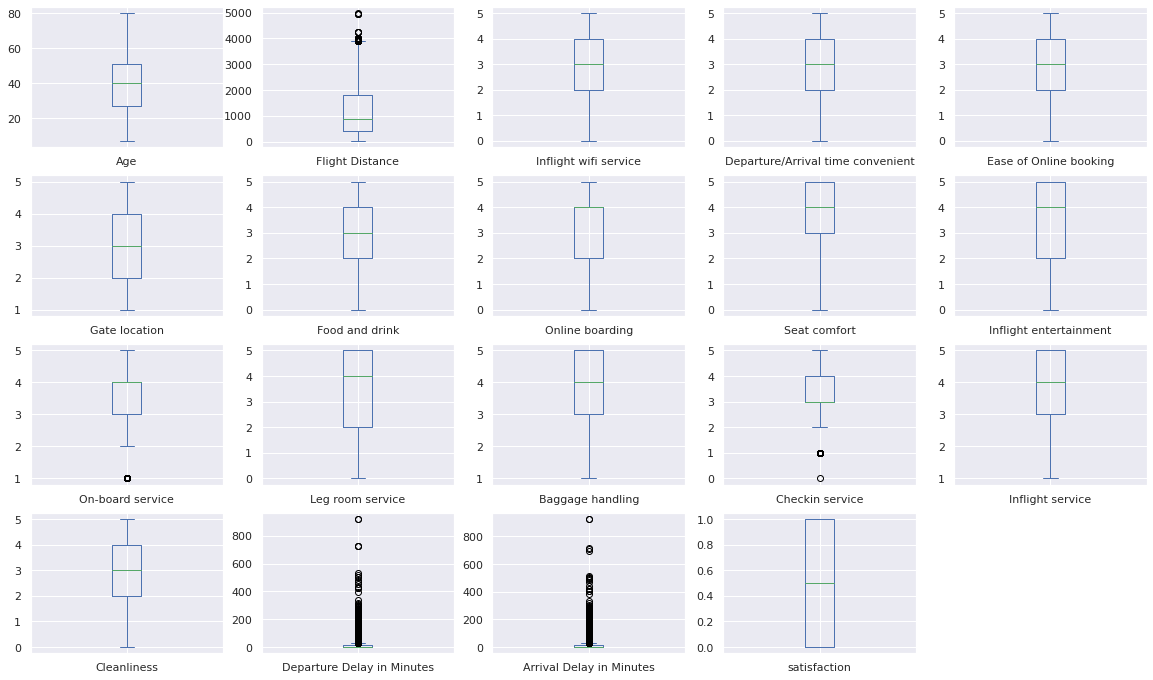

In [494]:
#check outliers 
train.plot(kind = "box" , subplots = True , figsize = (20,15) ,  layout = (5,5))
plt.show()

In [495]:
#ustunlar to'g'risidagi statistik ma'lumotlar
train[['Flight Distance', 'Departure Delay in Minutes', 'Arrival Delay in Minutes']].describe().T

,count,mean,std,min,25%,50%,75%,max
Flight Distance,9972.0,1229.401324,1022.402516,31.0,420.0,863.5,1809.25,4983.0
Departure Delay in Minutes,9972.0,14.323406,39.547671,0.0,0.0,0.0,12.00,921.0
Arrival Delay in Minutes,9972.0,14.709888,40.046355,0.0,0.0,0.0,12.00,924.0


In [496]:
train.describe().T

,count,mean,std,min,25%,50%,75%,max
Age,9972.0,39.367730,14.885497,7.0,27.0,40.0,51.00,80.0
Flight Distance,9972.0,1229.401324,1022.402516,31.0,420.0,863.5,1809.25,4983.0
Inflight wifi service,9972.0,2.779382,1.363178,0.0,2.0,3.0,4.00,5.0
Departure/Arrival time convenient,9972.0,3.064380,1.527427,0.0,2.0,3.0,4.00,5.0
Ease of Online booking,9972.0,2.797132,1.421520,0.0,2.0,3.0,4.00,5.0
Gate location,9972.0,2.980846,1.283711,1.0,2.0,3.0,4.00,5.0
Food and drink,9972.0,3.215002,1.333063,0.0,2.0,3.0,4.00,5.0
Online boarding,9972.0,3.348375,1.353250,0.0,2.0,4.0,4.00,5.0
Seat comfort,9972.0,3.492680,1.310813,0.0,3.0,4.0,5.00,5.0
Inflight entertainment,9972.0,3.404031,1.331863,0.0,2.0,4.0,5.00,5.0


In [497]:
test.describe(). T

,count,mean,std,min,25%,50%,75%,max
Age,3981.0,39.898769,14.751886,7.0,27.0,40.0,51.0,80.0
Flight Distance,3981.0,1217.677970,1013.477225,67.0,416.0,867.0,1749.0,4983.0
Inflight wifi service,3981.0,2.766893,1.381107,0.0,2.0,3.0,4.0,5.0
Departure/Arrival time convenient,3981.0,3.021603,1.554871,0.0,2.0,3.0,4.0,5.0
Ease of Online booking,3981.0,2.784727,1.449182,0.0,2.0,3.0,4.0,5.0
Gate location,3981.0,2.981914,1.287815,1.0,2.0,3.0,4.0,5.0
Food and drink,3981.0,3.281588,1.332559,0.0,2.0,3.0,4.0,5.0
Online boarding,3981.0,3.358453,1.351668,0.0,2.0,4.0,4.0,5.0
Seat comfort,3981.0,3.514192,1.319781,1.0,3.0,4.0,5.0,5.0
Inflight entertainment,3981.0,3.412962,1.322884,1.0,2.0,4.0,5.0,5.0


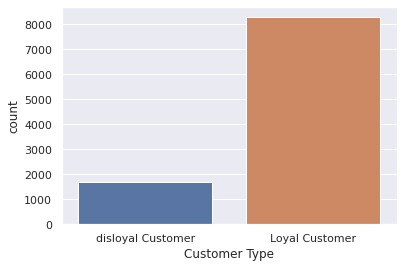

In [498]:
ax = sns.countplot(x="Customer Type", data=train)

Bu grafikadan Sodiq mijozlar kopligini korishimiz mumkun

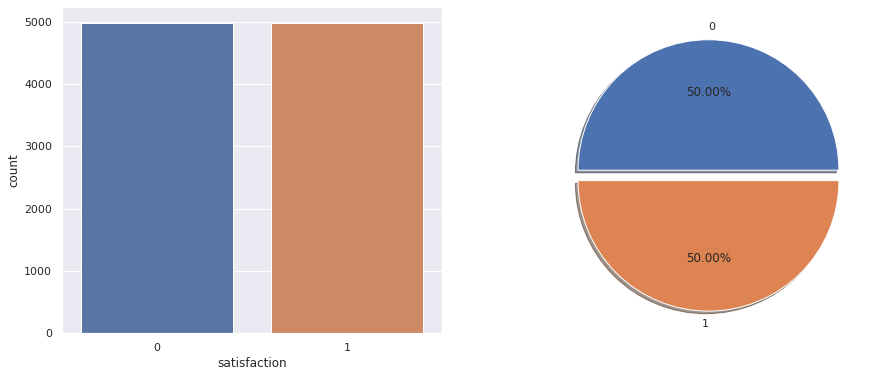

In [499]:
plt.figure(figsize = (15, 6))
plt.subplot(1, 2, 1)
sns.countplot(x = train['satisfaction'], data = train)

plt.subplot(1, 2, 2)
label = [train.satisfaction.unique()[0], train.satisfaction.unique()[1]]
plt.pie(x= train['satisfaction'].value_counts(), labels = label, explode = (0, 0.08), shadow = True, autopct = '%1.2f%%')

plt.show()

Yuqoridagi grafikadan biz mijozlarning yarmidan ko'pi mamnun ekanligini ko'rishimiz mumkin, shuning uchun biz qaysi xususiyatlar ularga ko'proq ta'sir qilishini bilishga harakat qilamiz.

In [500]:
def plot_data(column):
    plt.figure(figsize = (10, 5))
    plt.subplot(1, 2, 1)
    sns.countplot(x = train[column], data = train)

    plt.subplot(1, 2, 2)
    label =[train.satisfaction.unique()[0], train.satisfaction.unique()[1]]
    sns.countplot(x = train[column], hue = 'satisfaction', data = train, )

    plt.show()

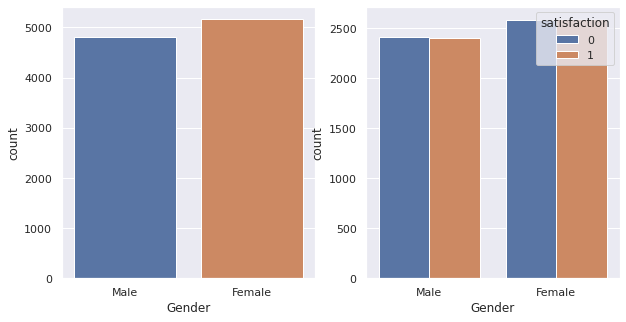

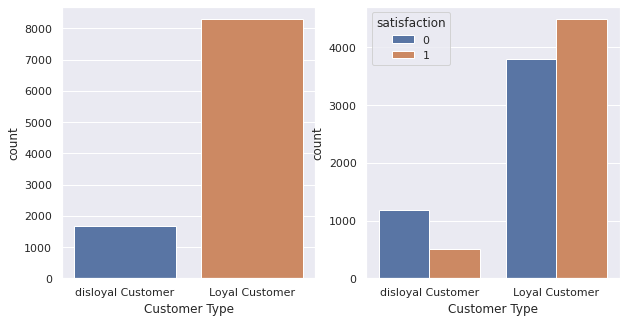

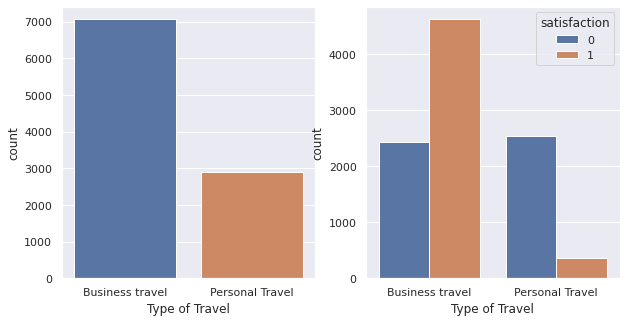

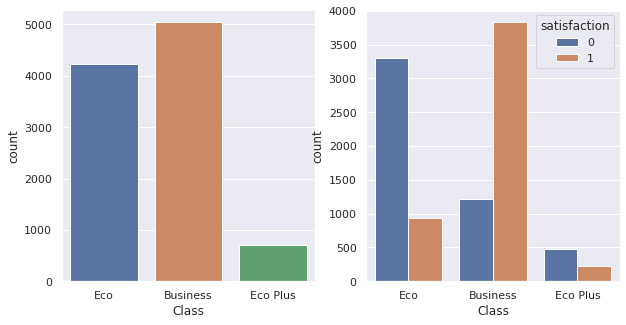

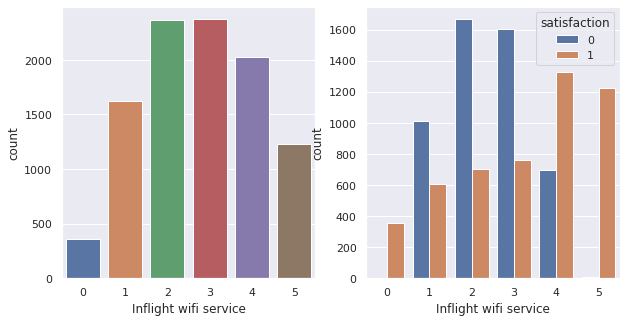

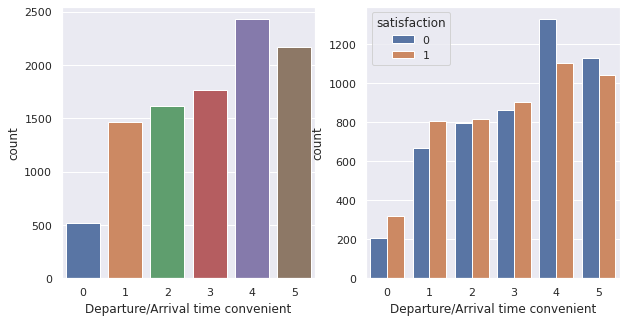

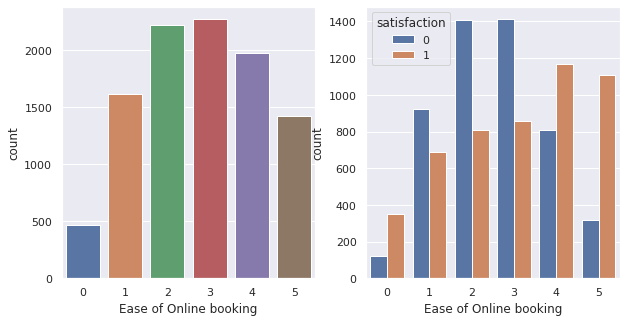

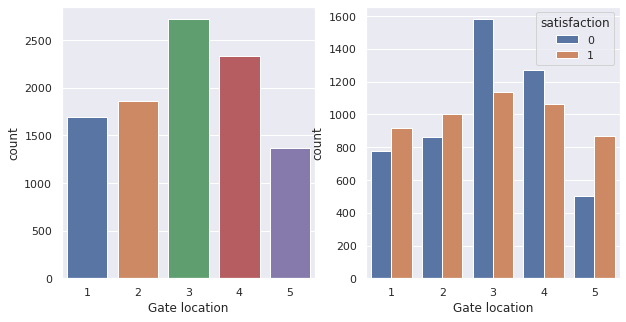

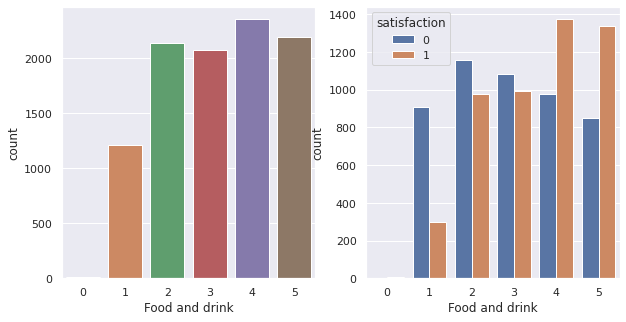

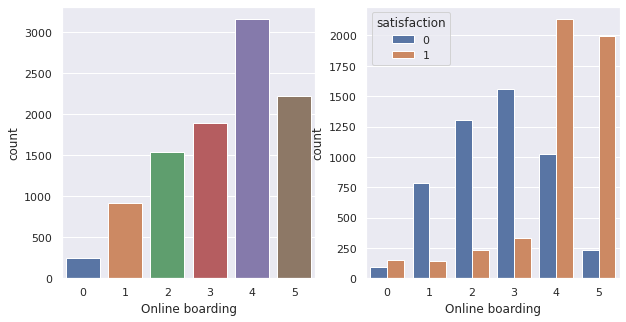

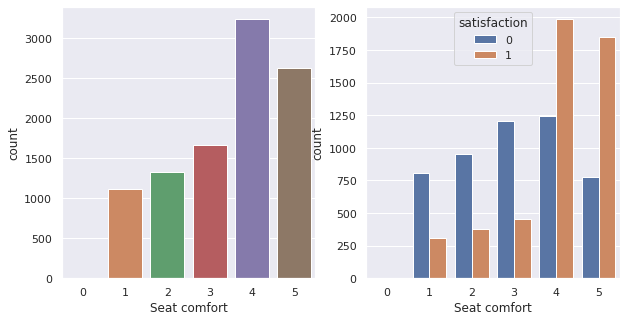

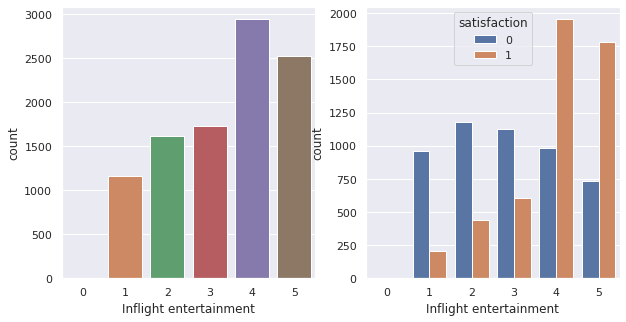

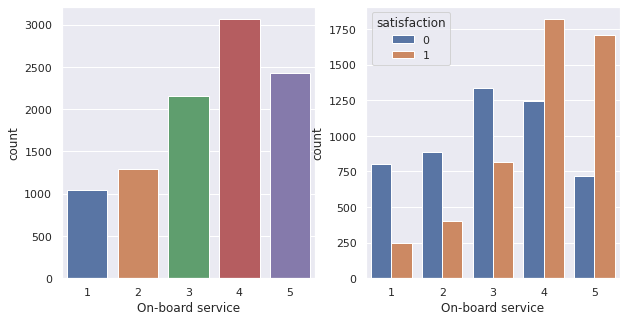

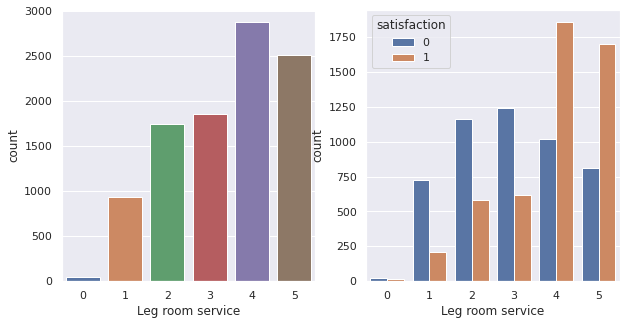

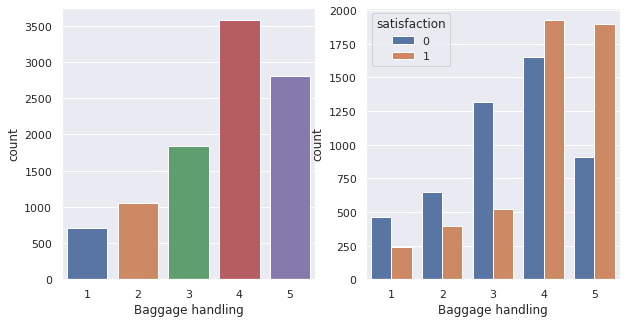

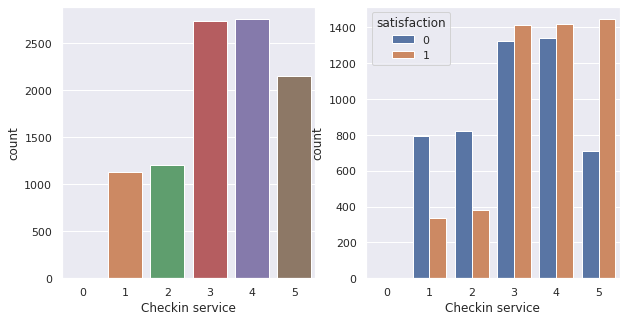

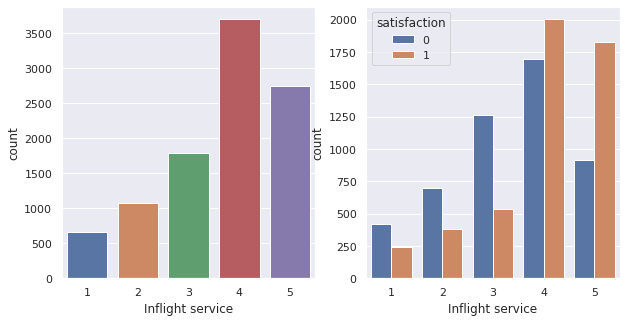

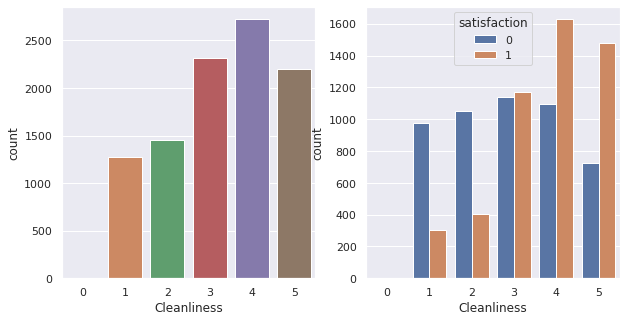

In [501]:
for i in train.columns:
    if len(train[i].unique())<= 6 and i != 'satisfaction':
        plot_data(i)

1- Mijozlarning yarmi erkaklar, qolgan yarmi ayollar va ikkalasi   uchun ko'pchilik mamnun emas.
 
2- Sodiq mijozlar - ko'pchilik mijozlarning yarmidan ko'pi norozi, sodiq bo'lmaganlar uchun esa ozchilik, lekin ularning aksariyati qoniqmaydi.

 3- biznes sayohatlari shaxsiy sayohatlardan ko'ra ko'proq va biznes sayohatidagi ko'pchilik mijozlar mamnun, ammo shaxsiy sayohat ko'pchilik mijozlarni qoniqtirmaydi

 4- parvozdagi biletlar sinfi uchun: eko plyus eng kam sinf, lekin ko'pchilik biznes va eko sinfidan norozi.
 sinfda ular mijozlarning ko'pchiligiga ega. Biznes sinfining aksariyat mijozlari bundan mamnun, ammo eko sinf uchun qarama-qarshi

 5- Parvoz ichidagi Wi-Fi xizmati ko'pchilik mijozlar bundan norozi.
 
 6- ketish vaqti uchun ko'pchilik odamlar 4 va 5 bahosini berishdi, lekin ayni paytda ular norozi, yani m,norozilikning yana bir sabablari bor
 
 7-onlayn bronlash 2-3 stavka oldi, bu ko'pchilikni qoniqtirmadi.
 koylashgan joylashuvi uchun eng ko'p bahosi 8 va 3 bo'lgan, shuning uchun odamlar bundan qoniqmadi.

 9- oziq-ovqat va ichimliklar yuqori ko'rsatkichlarga ega, lekin shu bilan birga odamlarning ko'pchiligi norozi yani ularning noroziligining yana bir sabablari bor 

 10- Onlayn bron qilish yuqori ko'rsatkichga ega va ko'pchilik bundan mamnun

 11- o'rindiqlarning qulayligi uchun eng ko'p mijozlarning ko'pchiligi mamnun 
 12- Parvoz ichidagi xizmatlar yuqori narxga  ekin mijozlarning  bu xizmatlaridan ko'pchiligi mamnun bo'ldi

 13- bortda xizmat ko'rsatish yuqori ko'rsatkichlarga ega, ammo mijozlarning yarmi qoniqadi, qolganlari esa qoniqmaydi

 14-leg room service  yuqori ko'rsatkichlarga ega va ko'pchilik bundan mamnun
 
 15- bbaggage hanling xizmati uchun yuqori narxga ega bo'lishiga qaramay, ko'plab mijozlar qoniqmadi, demak, boshqa sabablar ham bor.

 16- ro'yxatdan o'tish xizmati yuqori baholangan norozilik va samolyot ichidagi xizmat uchun ham xuddi shunday

 17- lekin tozalik uchun ko'pchilik stavkalar yuqori, lekin qoniqish juda past 



In [502]:
group_data = train.groupby(['Class']).mean().T[2:16]
group_data

Class,Business,Eco,Eco Plus
Inflight wifi service,2.806432,2.732421,2.869440
Departure/Arrival time convenient,2.920191,3.206229,3.243902
Ease of Online booking,2.923566,2.659509,2.720230
Gate location,2.992654,2.971213,2.954089
Food and drink,3.339091,3.076451,3.160689
Online boarding,3.808021,2.862907,2.978479
Seat comfort,3.812587,3.145116,3.294118
Inflight entertainment,3.702601,3.079047,3.222382
On-board service,3.752432,3.159745,3.093257
Leg room service,3.717094,3.119396,3.053085


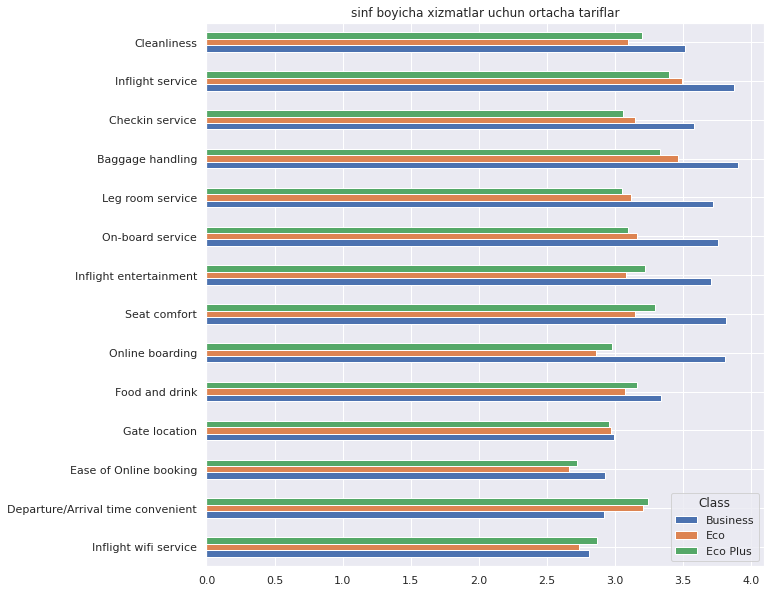

In [503]:
group_data.plot.barh(figsize = (10, 10), stacked = False, title = 'sinf boyicha xizmatlar uchun ortacha tariflar')
plt.show()

In [504]:
date = train.groupby(['Type of Travel']).mean().T[2:16]
group_data

Class,Business,Eco,Eco Plus
Inflight wifi service,2.806432,2.732421,2.869440
Departure/Arrival time convenient,2.920191,3.206229,3.243902
Ease of Online booking,2.923566,2.659509,2.720230
Gate location,2.992654,2.971213,2.954089
Food and drink,3.339091,3.076451,3.160689
Online boarding,3.808021,2.862907,2.978479
Seat comfort,3.812587,3.145116,3.294118
Inflight entertainment,3.702601,3.079047,3.222382
On-board service,3.752432,3.159745,3.093257
Leg room service,3.717094,3.119396,3.053085


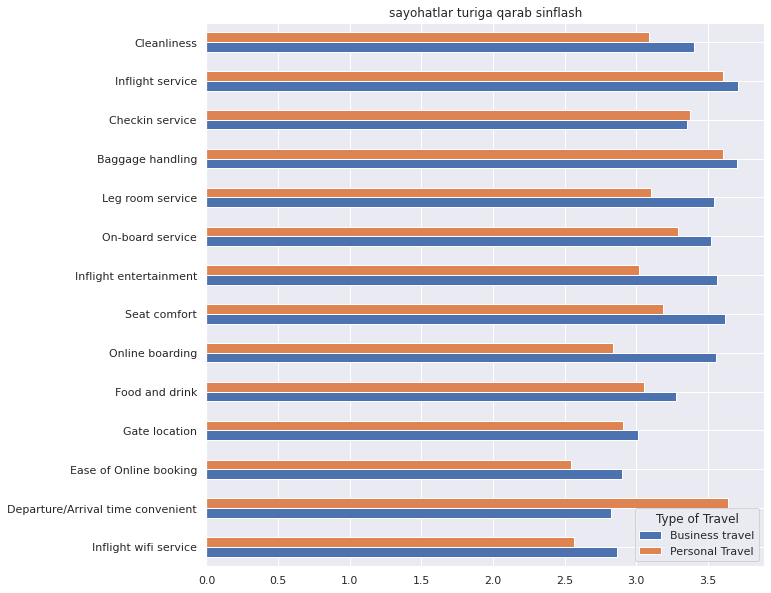

In [505]:
date.plot.barh(figsize = (10, 10), title = 'sayohatlar turiga qarab sinflash')
plt.show()

In [506]:
grouped = train.groupby(['Customer Type', 'Type of Travel', 'satisfaction'])['Age'].count()[:6]
grouped

Customer Type      Type of Travel   satisfaction
Loyal Customer     Business travel  0               1269
                                    1               4121
                   Personal Travel  0               2533
                                    1                360
disloyal Customer  Business travel  0               1170
                                    1                502
Name: Age, dtype: int64

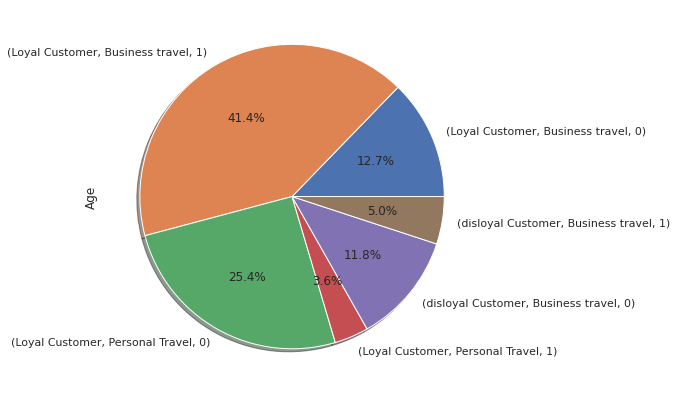

In [507]:
grouped.plot.pie(shadow = True , autopct = '%1.1f%%', subplots = True, figsize = (7, 7))
plt.show()

In [508]:
grouped = train.groupby(['Customer Type', 'Type of Travel']).mean().T[2:16]
grouped

Customer Type                      Loyal Customer                  \
Type of Travel                    Business travel Personal Travel   
Inflight wifi service                    2.896104        2.568960   
Departure/Arrival time convenient        2.963265        3.640512   
Ease of Online booking                   2.949351        2.548220   
Gate location                            3.020037        2.906326   
Food and drink                           3.368089        3.053232   
Online boarding                          3.802783        2.844798   
Seat comfort                             3.817625        3.182855   
Inflight entertainment                   3.728942        3.015900   
On-board service                         3.595547        3.291047   
Leg room service                         3.651206        3.099551   
Baggage handling                         3.700186        3.605254   
Checkin service                          3.381447        3.373315   
Inflight service                         3.697403        3.606291   
Cleanliness                              3.525974        3.085724   

Customer Type                     disloyal Customer                  
Type of Travel                      Business travel Personal Travel  
Inflight wifi service                      2.771531        2.352941  
Departure/Arrival time convenient          2.385167        3.882353  
Ease of Online booking                     2.744617        2.058824  
Gate location                              2.980263        3.294118  
Food and drink                             2.998206        3.529412  
Online boarding                            2.767943        2.058824  
Seat comfort                               2.977871        3.823529  
Inflight entertainment                     3.026914        3.529412  
On-board service                           3.281699        3.529412  
Leg room service                           3.205742        3.764706  
Baggage handling                           3.709928        4.058824  
Checkin service                            3.273325        3.235294  
Inflight service                           3.747010        4.000000  
Cleanliness                                3.011962        3.529412

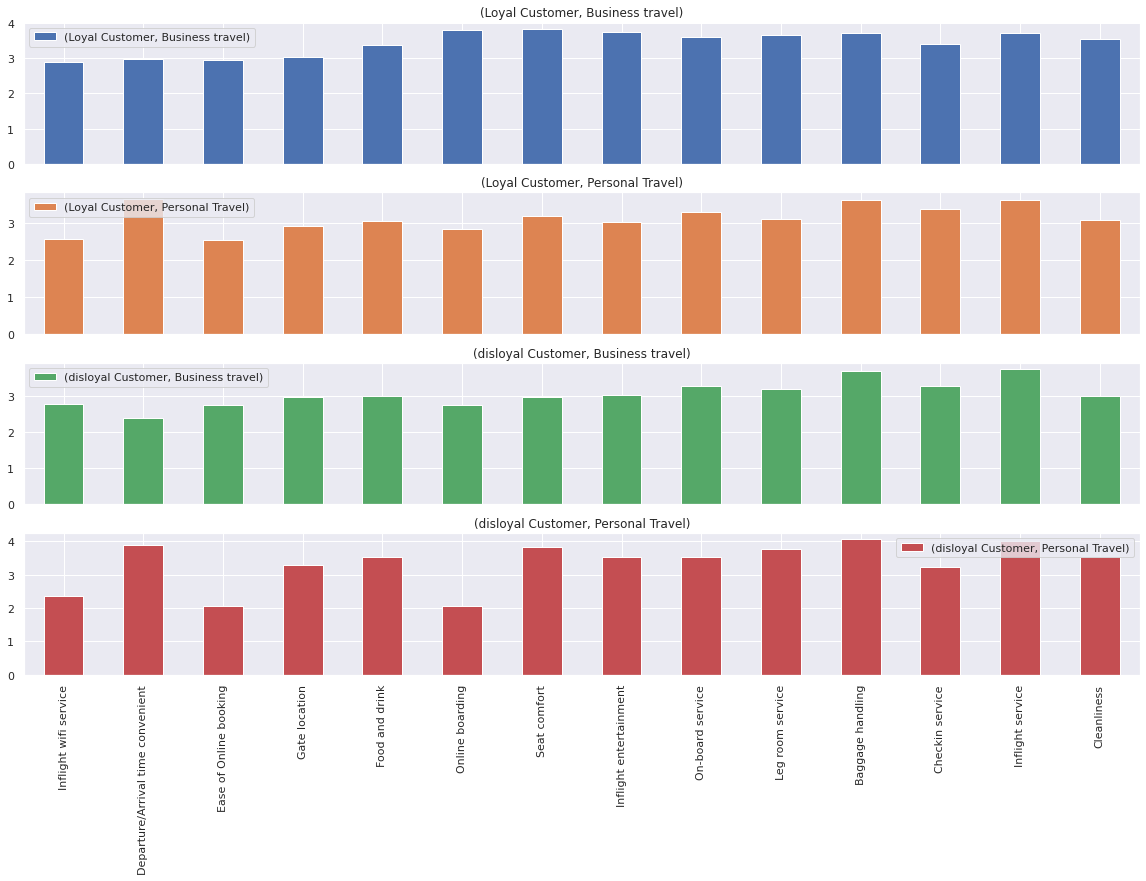

In [509]:
grouped.plot.bar(figsize = (20, 12), subplots = True)
plt.show()

In [510]:
b = buisness_travels = train[train['Type of Travel'] == 'Business travel']
buisness_travels.drop(['Gender', 'Departure Delay in Minutes', 'Flight Distance'], axis = 1, inplace = True) 

/usr/local/lib/python3.7/dist-packages/pandas/core/frame.py:4913: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  errors=errors,


In [511]:
p = personal_travels = train[train['Type of Travel'] == 'Personal Travel']
personal_travels.drop(['Gender', 'Departure Delay in Minutes', 'Flight Distance'], axis = 1, inplace = True) #drop unnecessary columns

In [512]:
buisness_travels.head(5)

,Customer Type,Age,Type of Travel,Class,Inflight wifi service,Departure/Arrival time convenient,Ease of Online booking,Gate location,Food and drink,Online boarding,Seat comfort,Inflight entertainment,On-board service,Leg room service,Baggage handling,Checkin service,Inflight service,Cleanliness,Arrival Delay in Minutes,satisfaction
0,disloyal Customer,33,Business travel,Eco,2,3,2,4,4,2,4,4,3,1,3,4,3,4,3.0,0
1,Loyal Customer,49,Business travel,Business,4,1,4,4,3,5,4,5,5,5,5,3,5,3,0.0,1
2,Loyal Customer,43,Business travel,Eco,1,4,4,4,4,4,3,1,1,1,1,1,1,2,18.0,0
3,Loyal Customer,27,Business travel,Business,3,3,3,3,2,2,2,2,4,4,5,5,4,2,0.0,1
6,Loyal Customer,38,Business travel,Eco,5,1,1,1,5,5,5,5,1,4,4,5,4,5,5.0,1


In [513]:
personal_travels.head(5)

,Customer Type,Age,Type of Travel,Class,Inflight wifi service,Departure/Arrival time convenient,Ease of Online booking,Gate location,Food and drink,Online boarding,Seat comfort,Inflight entertainment,On-board service,Leg room service,Baggage handling,Checkin service,Inflight service,Cleanliness,Arrival Delay in Minutes,satisfaction
4,Loyal Customer,11,Personal Travel,Eco,3,4,3,2,4,3,4,4,5,2,5,3,5,4,10.0,0
5,Loyal Customer,30,Personal Travel,Eco Plus,2,4,2,2,5,2,5,5,4,5,5,4,4,5,0.0,0
13,Loyal Customer,19,Personal Travel,Eco,3,5,4,5,1,4,1,1,5,2,5,2,4,1,0.0,0
16,Loyal Customer,47,Personal Travel,Eco,3,4,3,2,4,3,4,4,3,2,5,5,5,4,61.0,0
18,Loyal Customer,39,Personal Travel,Eco,4,1,4,4,1,4,1,1,1,5,3,2,3,1,0.0,0


/usr/local/lib/python3.7/dist-packages/seaborn/distributions.py:2619: FutureWarning: `distplot` is a deprecated function and will be removed in a future version. Please adapt your code to use either `displot` (a figure-level function with similar flexibility) or `histplot` (an axes-level function for histograms).
  warnings.warn(msg, FutureWarning)
/usr/local/lib/python3.7/dist-packages/seaborn/distributions.py:2619: FutureWarning: `distplot` is a deprecated function and will be removed in a future version. Please adapt your code to use either `displot` (a figure-level function with similar flexibility) or `histplot` (an axes-level function for histograms).
  warnings.warn(msg, FutureWarning)


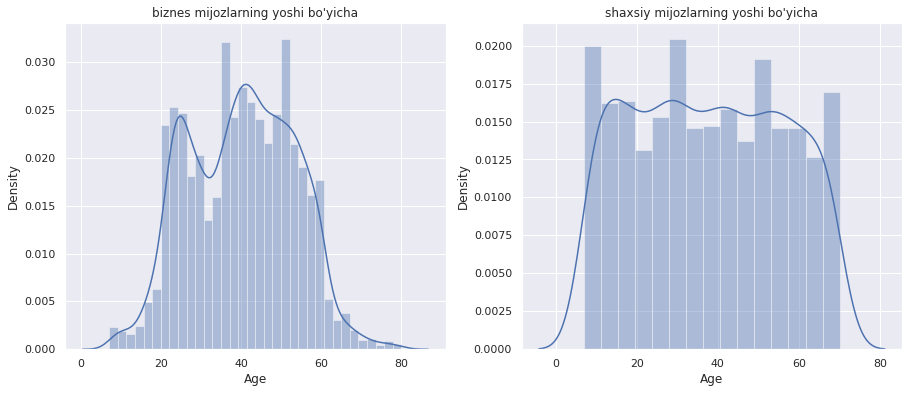

In [514]:
plt.figure(figsize = (15, 6))
plt.subplot(1, 2, 1)
plt.title = ('age_distribution')
sns.distplot(buisness_travels['Age']).set_title("biznes mijozlarning yoshi bo'yicha")

plt.subplot(1, 2, 2)
plt.title = ('age distribution in personal travels')
sns.distplot(personal_travels['Age']).set_title("shaxsiy mijozlarning yoshi bo'yicha")

plt.show()

In [515]:
def separate_ages(age):
    if age <= 18:
        return 'underage'
    elif 18 < age <= 30:
        return 'youth'
    elif 30 < age < 60:
        return 'adult'
    else:
        return 'old'

In [516]:
buisness_travels.Age = buisness_travels.Age.apply(separate_ages)
personal_travels.Age = personal_travels.Age.apply(separate_ages)

/usr/local/lib/python3.7/dist-packages/pandas/core/generic.py:5516: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  self[name] = value


In [517]:
print(buisness_travels.Age.value_counts())
print(personal_travels.Age.value_counts())

adult       4652
youth       1735
old          415
underage     260
Name: Age, dtype: int64
adult       1314
underage     576
youth        573
old          447
Name: Age, dtype: int64


/usr/local/lib/python3.7/dist-packages/seaborn/_decorators.py:43: FutureWarning: Pass the following variable as a keyword arg: x. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.
  FutureWarning
/usr/local/lib/python3.7/dist-packages/seaborn/_decorators.py:43: FutureWarning: Pass the following variable as a keyword arg: x. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.
  FutureWarning


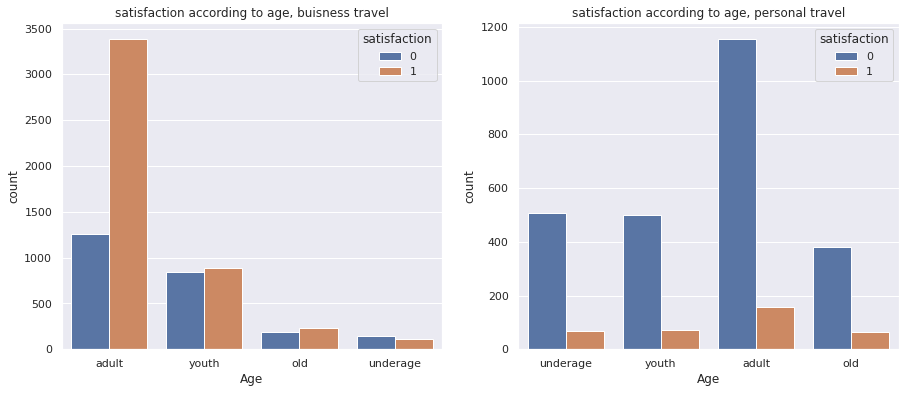

In [518]:
plt.figure(figsize = (15, 6))
plt.subplot(1, 2, 1) 
sns.countplot(buisness_travels['Age'], hue = 'satisfaction', data = buisness_travels).set_title("satisfaction according to age, buisness travel")

plt.subplot(1, 2, 2)
sns.countplot(personal_travels['Age'], hue = 'satisfaction', data = personal_travels).set_title("satisfaction according to age, personal travel")

plt.show()

Encoding

In [519]:
train.corrwith(train['satisfaction']).abs().sort_values(ascending=False)

satisfaction                         1.000000
Online boarding                      0.504671
Inflight entertainment               0.401109
Seat comfort                         0.342061
On-board service                     0.327361
Leg room service                     0.325405
Cleanliness                          0.310046
Flight Distance                      0.298484
Inflight wifi service                0.277497
Baggage handling                     0.248839
Inflight service                     0.240580
Checkin service                      0.232337
Food and drink                       0.206881
Ease of Online booking               0.164025
Age                                  0.145327
Departure/Arrival time convenient    0.067758
Arrival Delay in Minutes             0.048650
Departure Delay in Minutes           0.043456
Gate location                        0.007422
dtype: float64

In [520]:
df3 =train.drop(['Gender', 'Departure Delay in Minutes', 'Gate location'], axis = 1)
df3


,Customer Type,Age,Type of Travel,Class,Flight Distance,Inflight wifi service,Departure/Arrival time convenient,Ease of Online booking,Food and drink,Online boarding,Seat comfort,Inflight entertainment,On-board service,Leg room service,Baggage handling,Checkin service,Inflight service,Cleanliness,Arrival Delay in Minutes,satisfaction
0,disloyal Customer,33,Business travel,Eco,571,2,3,2,4,2,4,4,3,1,3,4,3,4,3.0,0
1,Loyal Customer,49,Business travel,Business,1431,4,1,4,3,5,4,5,5,5,5,3,5,3,0.0,1
2,Loyal Customer,43,Business travel,Eco,867,1,4,4,4,4,3,1,1,1,1,1,1,2,18.0,0
3,Loyal Customer,27,Business travel,Business,1550,3,3,3,2,2,2,2,4,4,5,5,4,2,0.0,1
4,Loyal Customer,11,Personal Travel,Eco,526,3,4,3,4,3,4,4,5,2,5,3,5,4,10.0,0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
9995,Loyal Customer,54,Personal Travel,Eco,1068,1,4,1,2,5,4,4,4,1,4,4,4,3,12.0,0
9996,Loyal Customer,54,Business travel,Eco Plus,1399,4,1,1,2,3,3,4,4,4,4,1,4,4,21.0,0
9997,Loyal Customer,46,Business travel,Business,1440,3,3,2,3,4,5,4,4,4,4,3,4,3,38.0,1
9998,Loyal Customer,41,Business travel,Business,90,4,1,4,5,4,5,3,4,5,5,5,4,5,210.0,1


## Ma'lumotlarga ishlov berish

In [521]:
data = train[['Customer Type', 'Type of Travel','Class','Online boarding', 'satisfaction']]

In [522]:
data = data.dropna()
data.shape

(9972, 5)

ML ga tayyorgarlik

In [524]:
from sklearn.neighbors import KNeighborsClassifier
from sklearn.tree import DecisionTreeClassifier
from sklearn.ensemble import RandomForestClassifier
from xgboost import XGBClassifier
from sklearn.naive_bayes import GaussianNB
from sklearn.linear_model import LogisticRegression
from sklearn.svm import SVC

In [525]:
#importing validation models
from sklearn.preprocessing import StandardScaler
from sklearn.model_selection import train_test_split
from sklearn.metrics import confusion_matrix
from sklearn.metrics import classification_report
from sklearn.metrics import accuracy_score
from sklearn.metrics import plot_confusion_matrix
from sklearn.model_selection import GridSearchCV
from sklearn.neighbors import KNeighborsClassifier

from sklearn.linear_model import LogisticRegression
from sklearn.tree import DecisionTreeClassifier, plot_tree
from sklearn.ensemble import RandomForestClassifier
from sklearn.svm import SVC
from xgboost import XGBClassifier

from sklearn.pipeline import Pipeline
from sklearn import metrics 
import sklearn.metrics as metrics
from sklearn.metrics import precision_score, recall_score, f1_score, accuracy_score

In [526]:
# Matnli ustunlarni songa o'tkazamiz
encoded = pd.get_dummies(data)
encoded.head()

,Online boarding,satisfaction,Customer Type_Loyal Customer,Customer Type_disloyal Customer,Type of Travel_Business travel,Type of Travel_Personal Travel,Class_Business,Class_Eco,Class_Eco Plus
0,2,0,0,1,1,0,0,1,0
1,5,1,1,0,1,0,1,0,0
2,4,0,1,0,1,0,0,1,0
3,2,1,1,0,1,0,1,0,0
4,3,0,1,0,0,1,0,1,0


In [527]:
X = encoded.drop("satisfaction", axis=1)
y = encoded['satisfaction']

In [528]:
scaler = StandardScaler()
X = scaler.fit_transform(X)

In [529]:
X_train, X_test, y_train, y_test=train_test_split(X, y, test_size=0.2, stratify=y, random_state=42)

# **ML**

k-NN

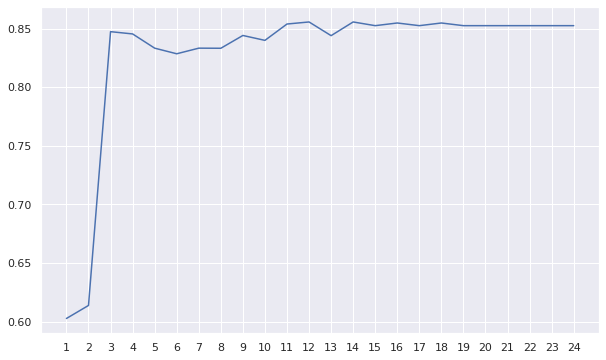

In [530]:
f1 = []
for k in range(1,25):
    knn = KNeighborsClassifier(n_neighbors=k) # k-ni qiymati
    knn.fit(X_train, y_train)
    y_predicted = knn.predict(X_test)
    f1.append(f1_score(y_test, y_predicted))

plt.figure(figsize=(10,6))
plt.plot(range(1,25),f1)
plt.xticks(range(1,25))
plt.show()

              precision    recall  f1-score   support

           0       0.86      0.77      0.81       998
           1       0.79      0.88      0.83       997

    accuracy                           0.82      1995
   macro avg       0.83      0.82      0.82      1995
weighted avg       0.83      0.82      0.82      1995

Model aniqligi: 0.8536340852130326


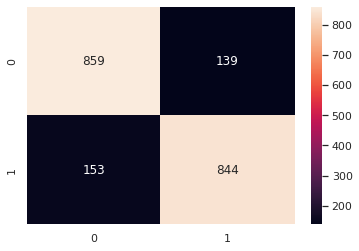

In [531]:
knn = KNeighborsClassifier(n_neighbors=5) # k-ni qiymati
knn.fit(X_train, y_train)

y_predict = knn.predict(X_test)

print(classification_report(y_test, y_predict))
print("Model aniqligi:", accuracy_score(y_test,y_predicted))

# Confusion matrix
conf_mat = confusion_matrix(y_test, y_predicted)
sns.heatmap(conf_mat, annot=True, fmt="g");

Logistic Regression

              precision    recall  f1-score   support

           0       0.83      0.82      0.82       998
           1       0.82      0.83      0.83       997

    accuracy                           0.83      1995
   macro avg       0.83      0.83      0.83      1995
weighted avg       0.83      0.83      0.83      1995

Model aniqligi: 0.825062656641604


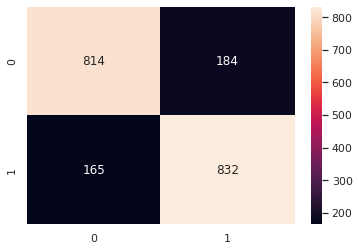

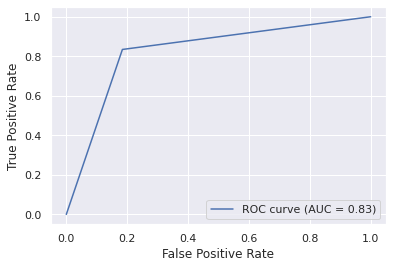

In [532]:
# Modelni yaratamiz (training)
LR_model = LogisticRegression()
LR_model.fit(X_train, y_train)

# Modelni baholaymiz
y_pred = LR_model.predict(X_test)
print(metrics.classification_report(y_test, y_pred))
print("Model aniqligi:", metrics.accuracy_score(y_test,y_pred))

## confusion matrix
conf_mat = metrics.confusion_matrix(y_test, y_pred)
sns.heatmap(conf_mat, annot=True,fmt="g")
plt.show()

## ROC curve
fpr, tpr, thresholds = metrics.roc_curve(y_test, y_pred)
roc_auc = metrics.auc(fpr, tpr)
display = metrics.RocCurveDisplay(fpr=fpr, tpr=tpr, roc_auc=roc_auc, estimator_name='ROC curve')
display.plot()
plt.show()

### Support Vector Machines

              precision    recall  f1-score   support

           0       0.82      0.91      0.86       998
           1       0.90      0.80      0.85       997

    accuracy                           0.85      1995
   macro avg       0.86      0.85      0.85      1995
weighted avg       0.86      0.85      0.85      1995

Model aniqligi: 0.8536340852130326


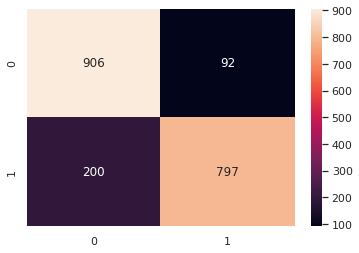

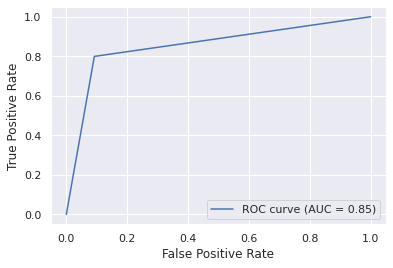

In [533]:
# Modelni yaratamiz (training)
svm_model = SVC()
svm_model.fit(X_train, y_train)

# Modelni baholaymiz
y_pred = svm_model.predict(X_test)
print(classification_report(y_test, y_pred))
print("Model aniqligi:", accuracy_score(y_test,y_pred))

## confusion matrix
conf_mat = confusion_matrix(y_test, y_pred)
sns.heatmap(conf_mat, annot=True,fmt="g")
plt.show()

## ROC curve
fpr, tpr, thresholds = metrics.roc_curve(y_test, y_pred)
roc_auc = metrics.auc(fpr, tpr)
display = metrics.RocCurveDisplay(fpr=fpr, tpr=tpr, roc_auc=roc_auc, estimator_name='ROC curve')
display.plot()
plt.show()

**Decision Tree**

              precision    recall  f1-score   support

           0       0.82      0.91      0.86       998
           1       0.90      0.80      0.85       997

    accuracy                           0.85      1995
   macro avg       0.86      0.85      0.85      1995
weighted avg       0.86      0.85      0.85      1995

Model aniqligi: 0.8546365914786967


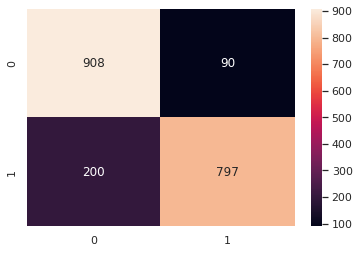

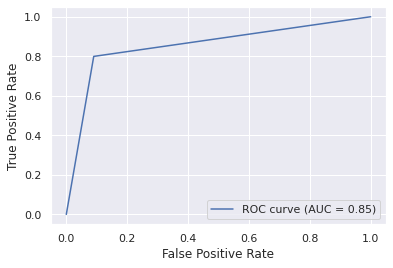

In [534]:
# Modelni yaratamiz (training)
tree_model = DecisionTreeClassifier()
tree_model.fit(X_train, y_train)

# Modelni baholaymiz
y_pred = tree_model.predict(X_test)
print(classification_report(y_test, y_pred))
print("Model aniqligi:", accuracy_score(y_test,y_pred))

## confusion matrix
conf_mat = confusion_matrix(y_test, y_pred)
sns.heatmap(conf_mat, annot=True,fmt="g")
plt.show()

## ROC curve
fpr, tpr, thresholds = metrics.roc_curve(y_test, y_pred)
roc_auc = metrics.auc(fpr, tpr)
display = metrics.RocCurveDisplay(fpr=fpr, tpr=tpr, roc_auc=roc_auc, estimator_name='ROC curve')
display.plot()
plt.show()

### Random Forest

              precision    recall  f1-score   support

           0       0.82      0.91      0.86       998
           1       0.90      0.80      0.85       997

    accuracy                           0.85      1995
   macro avg       0.86      0.85      0.85      1995
weighted avg       0.86      0.85      0.85      1995

Model aniqligi: 0.8546365914786967


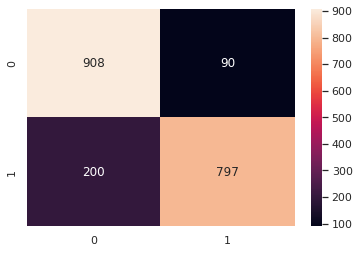

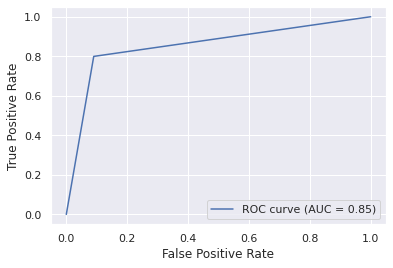

In [536]:
# Modelni yaratamiz (training)
RF_model = RandomForestClassifier(n_estimators=9)
RF_model.fit(X_train, y_train)

# Modelni baholaymiz
y_pred = RF_model.predict(X_test)
print(classification_report(y_test, y_pred))
print("Model aniqligi:", accuracy_score(y_test,y_pred))

## confusion matrix
conf_mat = confusion_matrix(y_test, y_pred)
sns.heatmap(conf_mat, annot=True,fmt="g")
plt.show()

## ROC curve
fpr, tpr, thresholds = metrics.roc_curve(y_test, y_pred)
roc_auc = metrics.auc(fpr, tpr)
display = metrics.RocCurveDisplay(fpr=fpr, tpr=tpr, roc_auc=roc_auc, estimator_name='ROC curve')
display.plot()
plt.show()

### XGBoost

              precision    recall  f1-score   support

           0       0.82      0.91      0.86       998
           1       0.90      0.80      0.84       997

    accuracy                           0.85      1995
   macro avg       0.86      0.85      0.85      1995
weighted avg       0.86      0.85      0.85      1995

Model aniqligi: 0.8531328320802005


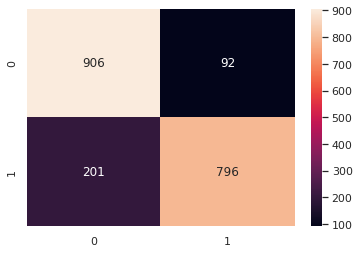

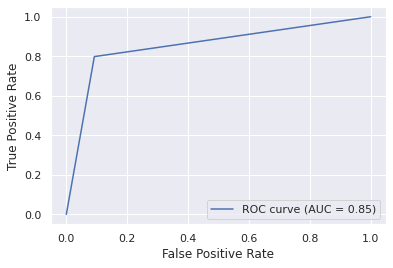

In [537]:
# Modelni yaratamiz (training)
xgb_model = XGBClassifier()
xgb_model.fit(X_train, y_train)

# Modelni baholaymiz
y_pred = xgb_model.predict(X_test)
print(classification_report(y_test, y_pred))
print("Model aniqligi:", accuracy_score(y_test,y_pred))

## confusion matrix
conf_mat = confusion_matrix(y_test, y_pred)
sns.heatmap(conf_mat, annot=True,fmt="g")
plt.show()

## ROC curve
fpr, tpr, thresholds = metrics.roc_curve(y_test, y_pred)
roc_auc = metrics.auc(fpr, tpr)
display = metrics.RocCurveDisplay(fpr=fpr, tpr=tpr, roc_auc=roc_auc, estimator_name='ROC curve')
display.plot()
plt.show()

# MACHINE LEARNING MODELNI aniqligini yanada yaxshilasa boladi hudo holasa keyingi versionda yana harakat qilaman Machine Learning modelni aniqlgini yuqori kotarishga 